##Sobel Edge Detection

Steps:
1. Take a grayscale image
2. To use 3x3 convolution , we pad the image with zeros
3. Convolve the image with the x and y kernels for Sobel, Sobel-Feldman, Scharr, Lapacian
4. Take the gradients for edge detection
5 final output

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
image_file = '/content/drive/MyDrive/mlpro/Bikesgray.jpg'
input_image = imread(image_file)


# imag =  [[ 1 ,7 ,119 ,13 ,12],
# [ 11, 21, 61 ,81, 91],
# [ 5 ,66, 6, 5, 5],
# [ 5, 66 ,166, 145, 155],
# [ 5, 66 ,136, 145, 155]]
# output = [[ 18 ,121, 71 ,120, 81], 
#           [ 51, 91, 77, 60 ,74] ,
#           [ 88, 99, 62 ,62, 97] ,
#           [107, 186, 129, 168, 213], 
#           [ 85 ,210, 240, 248, 255]]

Text(0.5, 1.0, 'original image')

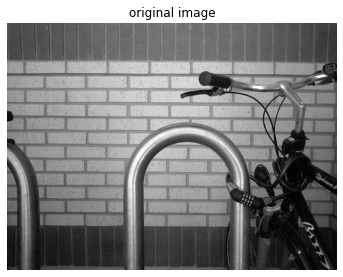

In [105]:
plt.figure(figsize=(50,10))
plt.subplot(2,3,1)
plt.axis('off')
plt.imshow(input_image,cmap='gray')
plt.title('original image')


In [106]:
# padding the image with the boundary values
# not used currently
# new_img = []
# for row in imag:
#   #for col in range(len(imag[0])):
#   temp = []
#   temp.append(row[0])
#   temp+=row 
#   temp.append(row[-1])
#   new_img.append(temp)
# first_row = new_img[0]
# last_row = new_img[-1]
# final_img = []
# final_img.append(first_row)
# final_img += new_img
# final_img.append(last_row)
# plt.imshow(final_img)

In [107]:
# padding the image with zero
# not used
# new_img0 = []


# for row in imag:
#   temp = []
#   temp.append(0)
#   temp+=row 
#   temp.append(0)
#   new_img0.append(temp)
# #print(new_img0)
# f_img = []
# row0 = [0]*len(new_img0[0])
# f_img.append(row0)
# f_img += new_img0
# f_img.append(row0)

# f_img

Text(0.5, 1.0, 'padded image')

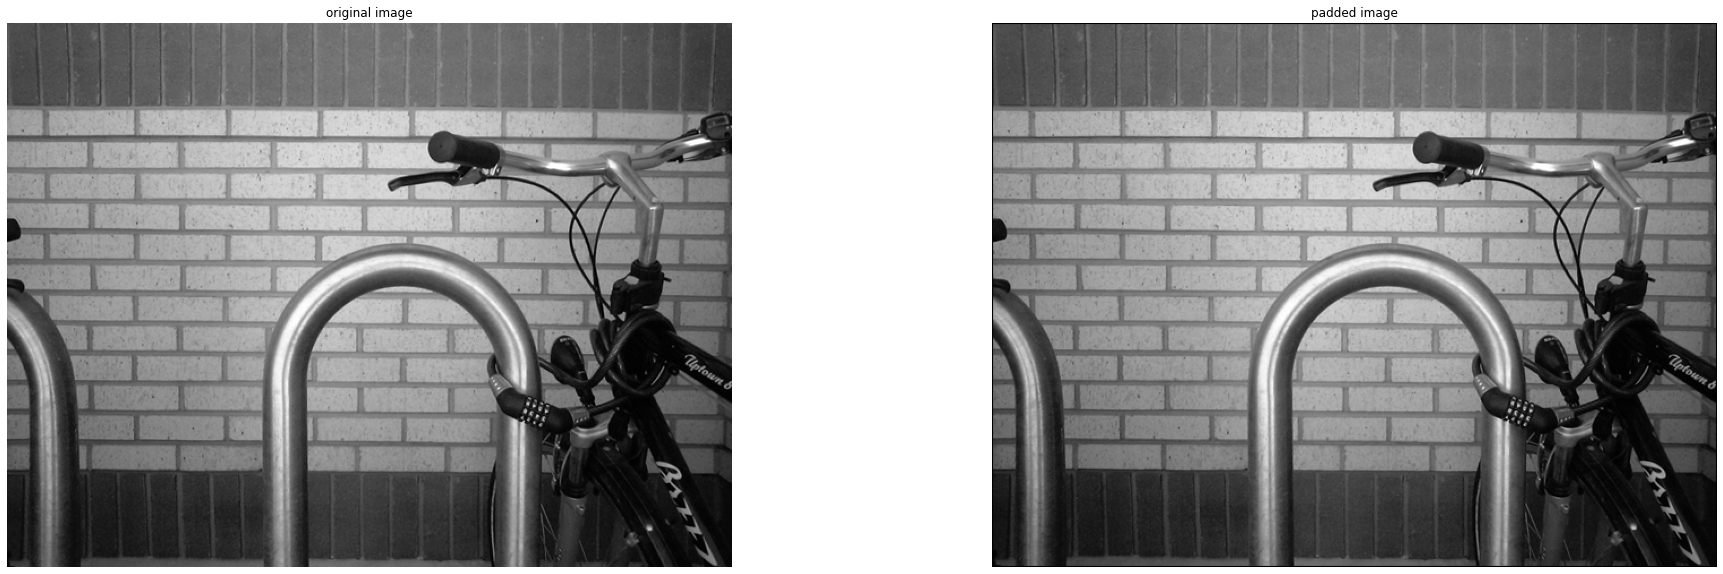

In [108]:
padded_image = np.pad(input_image, 1, 'constant', constant_values=(0, 0))
plt.figure(figsize=(50,10))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(input_image,cmap='gray')
plt.title('original image')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(padded_image,cmap='gray')
plt.title('padded image')

In [109]:
# getting the area to convolve given the starting points 
# and the conolution values for vertical and horizontal filters
Kx = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
Ky = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
def get_conv(r,c,img,Kx,Ky):
  #r,c are starting points

  a00 = img[r][c]
  a01 = img[r][c+1]
  a02 = img[r][c+2]
  a10 = img[r+1][c]
  a11 = img[r+1][c+1]
  a12 = img[r+1][c+2]
  a30 = img[r+2][c]
  a31 = img[r+2][c+1]
  a32 = img[r+2][c+2]
  c_matrix = [[a00,a01,a02],
     [a10,a11,a12],
     [a30,a31,a32]]
  #print(c_matrix)

  return (np.abs(np.sum(np.multiply(Kx,c_matrix))),np.abs(np.sum(np.multiply(Ky,c_matrix))))
x,y = get_conv(0,0,padded_image,Kx,Ky)



In [110]:
# getting the convoluted matrices for vertical and horizontal

def get_edges(padded_image,Kx,Ky):
  row_ln = len(padded_image)
  col_ln = len(padded_image[0])
  Ix = []
  Iy = []
  for row in range(row_ln-2):
    tempx = []
    tempy = []
    for col in range(col_ln-2):
      x,y = get_conv(row,col,padded_image,Kx,Ky) #final_image
      tempx.append(x)
      tempy.append(y)

    Ix.append(tempx)
    Iy.append(tempy)
  return Ix,Iy
Ix,Iy = get_edges(padded_image,Kx,Ky)

#print(Ix,"\n",Iy)

Text(0.5, 1.0, 'Iy Horizontal Edges')

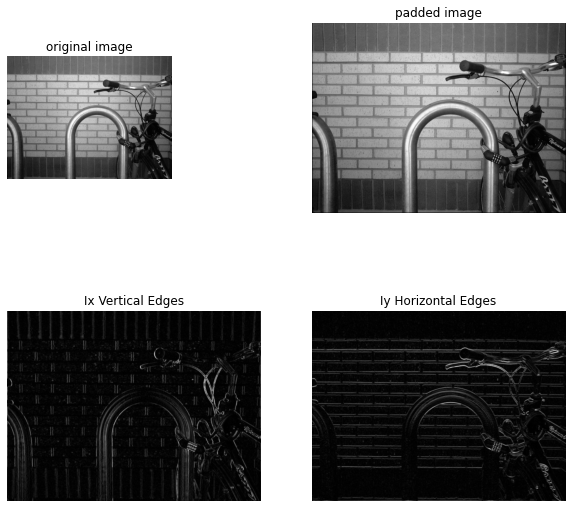

In [111]:
plt.figure(figsize=(10,15))
plt.subplot(3,3,1)
plt.axis('off')
plt.imshow(input_image,cmap='gray')
plt.title('original image')

plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(padded_image,cmap='gray')
plt.title('padded image')

plt.subplot(3,2,3)
plt.axis('off')
plt.imshow(Ix,cmap='gray')
plt.title('Ix Vertical Edges')

plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(Iy,cmap='gray')
plt.title('Iy Horizontal Edges')


In [112]:
# normalizing
def normalize(Ix,Iy):

  Ixn = np.divide(np.multiply(Ix,255),np.max(Ix))
  Iyn = np.divide(np.multiply(Iy,255),np.max(Iy))
  return Ixn,Iyn
Ixn,Iyn = normalize(Ix,Iy)


Text(0.5, 1.0, 'Iyn normalized')

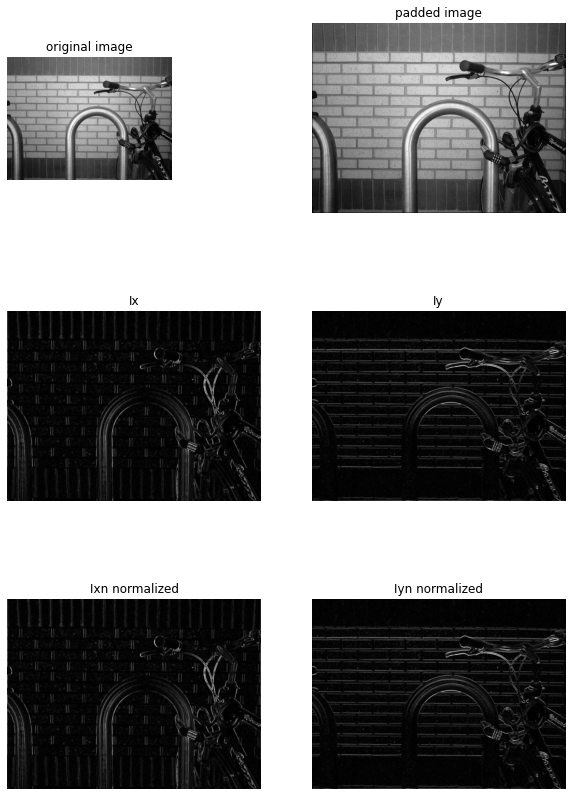

In [113]:
plt.figure(figsize=(10,15))
plt.subplot(3,3,1)
plt.axis('off')
plt.imshow(input_image,cmap='gray')
plt.title('original image')

plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(padded_image,cmap='gray')
plt.title('padded image')

plt.subplot(3,2,3)
plt.axis('off')
plt.imshow(Ix,cmap='gray')
plt.title('Ix')

plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(Iy,cmap='gray')
plt.title('Iy')

plt.subplot(3,2,5)
plt.axis('off')
plt.imshow(Ixn,cmap='gray')
plt.title('Ixn normalized')

plt.subplot(3,2,6)
plt.axis('off')
plt.imshow(Iyn,cmap='gray')
plt.title('Iyn normalized')


In [114]:
# getting the gradient and final image
def get_gradients(Ix,Iy):

  G = np.hypot(Ix, Iy)

  G *= 255.0 / G.max()
  theta = np.arctan2(Iy, Ix)
  return G
G = get_gradients(Ix,Iy)
#G

Text(0.5, 1.0, 'output')

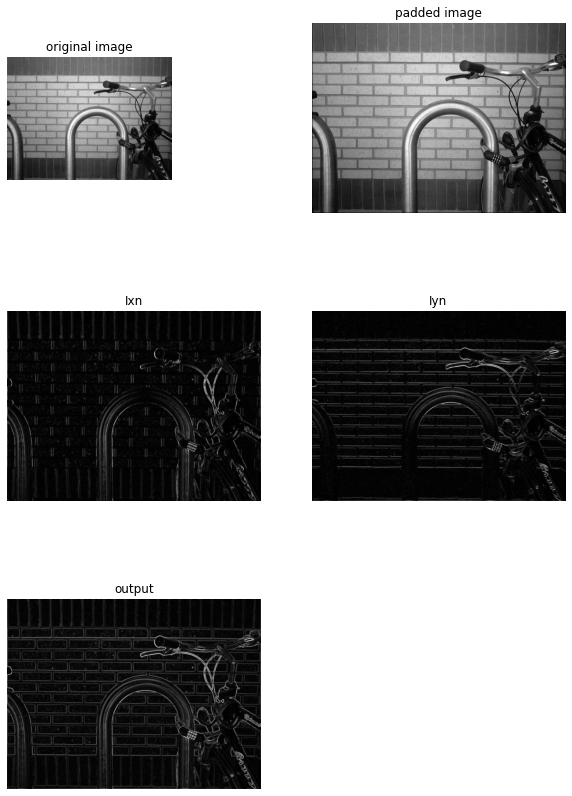

In [115]:
plt.figure(figsize=(10,15))
plt.subplot(3,3,1)
plt.axis('off')
plt.imshow(input_image,cmap='gray')
plt.title('original image')

plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(padded_image,cmap='gray')
plt.title('padded image')


plt.subplot(3,2,3)
plt.axis('off')
plt.imshow(Ixn,cmap='gray')
plt.title('Ixn')

plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(Iyn,cmap='gray')
plt.title('Iyn')


plt.subplot(3,2,5)
plt.axis('off')
plt.imshow(G,cmap='gray')
plt.title('output')



In [121]:
image_file = '/content/drive/MyDrive/mlpro/Bikesgray.jpg'
input_image = imread(image_file)

sobel_x = [[1, 0, -1], [2, 0, -2], [1, 0, -1]] 
sobel_y = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
sobel_fledman_x = [[3, 0, -3], [10, 0, -10], [3, 0, -3]] 
sobel_fledman_y = [[3, 10, 3], [0, 0, 0], [-3, -10, -3]]
scharr_x = [[47, 0, -47], [162, 0, -162], [347, 0, -47]] 
scharr_y = [[47, 162, 47], [0, 0, 0], [-47, -162, -47]]
prewitt_x = [[1, 0, -1], [1, 0, -1], [1, 0, -1]] 
prewitt_y = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
laplacian_x = [[0,1,0], [-1,4,-1], [0,1,0]] 
laplacian_y = [[-1, -1, -1], [-1,8,-1], [-1, -1, -1]]
def get_final_image(input_image,x,y):
  padded_image = np.pad(input_image, 1, 'constant', constant_values=(0, 0))
  Ix,Iy = get_edges(padded_image,x,y)
  Ixn,Iyn = normalize(Ix,Iy)
  out_image = get_gradients(Ixn,Iyn)
  return out_image
image_sobel = get_final_image(input_image,sobel_x,sobel_y)
image_sobel_fledman = get_final_image(input_image,sobel_fledman_x,sobel_fledman_y)
image_scharr = get_final_image(input_image,scharr_x,scharr_y)
image_prewitt = get_final_image(input_image,prewitt_x,prewitt_y)
image_lapacian = get_final_image(input_image,laplacian_x,laplacian_y)

Text(0.5, 1.0, 'Laplacian')

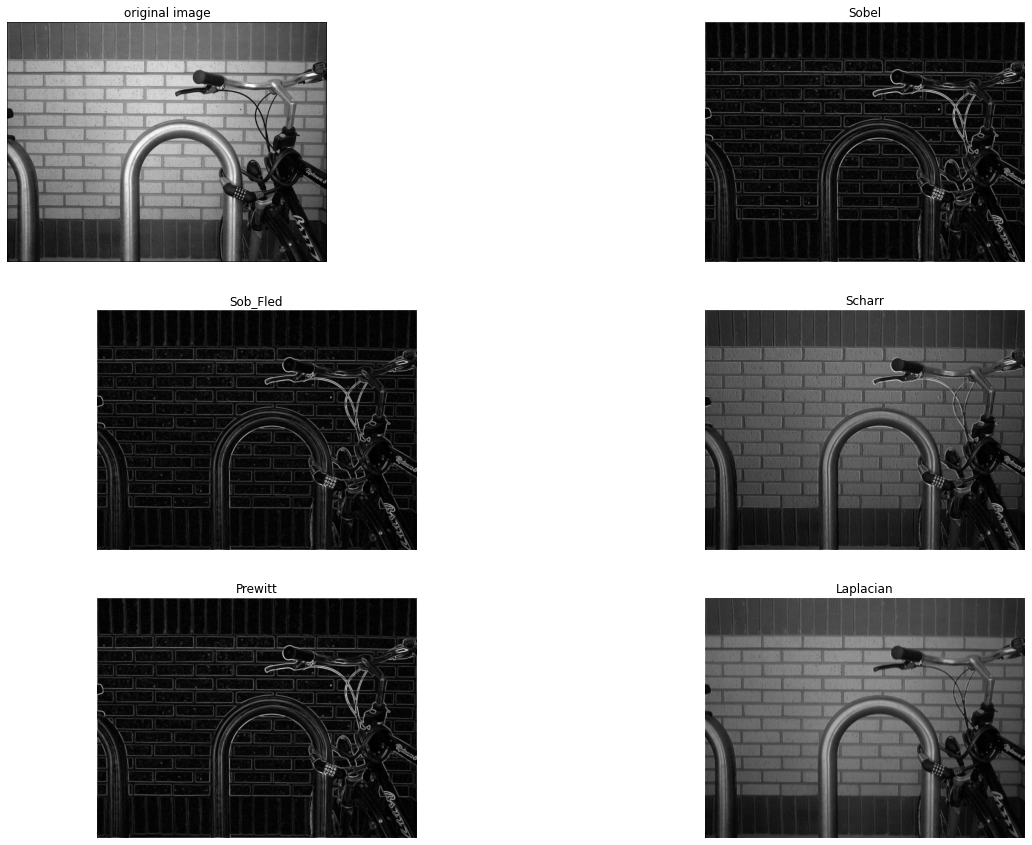

In [122]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.axis('off')
plt.imshow(padded_image,cmap='gray')
plt.title('original image')

plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(image_sobel,cmap='gray')
plt.title('Sobel')

plt.subplot(3,2,3)
plt.axis('off')
plt.imshow(image_sobel_fledman,cmap='gray')
plt.title('Sob_Fled')

plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(image_scharr,cmap='gray')
plt.title('Scharr')

plt.subplot(3,2,5)
plt.axis('off')
plt.imshow(image_prewitt,cmap='gray')
plt.title('Prewitt')

plt.subplot(3,2,6)
plt.axis('off')
plt.imshow(image_lapacian,cmap='gray')
plt.title('Laplacian')
